In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns

In [5]:
train = pd.read_csv('data2/train.csv', index_col = 'ID')
test = pd.read_csv('data2/test.csv', index_col = 'ID')

In [6]:
print(train.shape)
print(test.shape)

(699, 16)
(430, 15)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          516 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          321 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [9]:
train.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.070421,-0.214415,-0.078248,-0.013056,0.102294,0.042807,-0.039662
event,-0.070421,1.000000,0.008723,0.013961,-0.007915,-0.049588,-0.022668,0.022554
age,-0.214415,0.008723,1.000000,-0.169429,0.074582,0.032276,0.060051,0.020334
extraversion,-0.078248,0.013961,-0.169429,1.000000,-0.208904,-0.512422,-0.150632,0.287073
independ,-0.013056,-0.007915,0.074582,-0.208904,1.000000,-0.202594,-0.418896,0.038421
selfcontrol,0.102294,-0.049588,0.032276,-0.512422,-0.202594,1.000000,-0.074452,-0.573815
anxiety,0.042807,-0.022668,0.060051,-0.150632,-0.418896,-0.074452,1.000000,0.255866
novator,-0.039662,0.022554,0.020334,0.287073,0.038421,-0.573815,0.255866,1.000000


In [10]:
test.corr()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.213404,-0.129267,0.065200,0.050795,-0.040311,-0.066284
age,-0.213404,1.000000,-0.116970,0.043920,0.013688,0.038650,0.062018
extraversion,-0.129267,-0.116970,1.000000,-0.191124,-0.579729,-0.107014,0.317611
independ,0.065200,0.043920,-0.191124,1.000000,-0.121016,-0.436577,0.002716
selfcontrol,0.050795,0.013688,-0.579729,-0.121016,1.000000,-0.137211,-0.526195
anxiety,-0.040311,0.038650,-0.107014,-0.436577,-0.137211,1.000000,0.227025
novator,-0.066284,0.062018,0.317611,0.002716,-0.526195,0.227025,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          516 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


# 지도자 성별과 이직률과의 관계

<AxesSubplot:xlabel='head_gender', ylabel='count'>

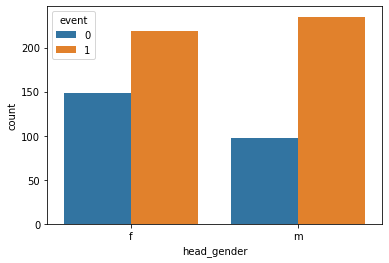

In [12]:
sns.countplot(data=train,x='head_gender', hue = 'event')

In [13]:
train['anxiety'].unique()

array([ 7.1,  4.8,  2.5,  5.6,  4. ,  7.9,  3.3,  8.7,  6.3,  9.4,  1.7,
       10. ])

In [14]:
train['stag'].value_counts()

3.975359     6
16.952772    4
39.227926    4
45.305955    4
59.203285    4
            ..
18.102669    1
33.872690    1
81.839836    1
24.410678    1
38.866530    1
Name: stag, Length: 391, dtype: int64

# selfcontrol에 따른 stag의 평균값

In [15]:
train_stagpt = train.pivot_table(values = 'stag', index = ['selfcontrol'], aggfunc = 'mean')
train_stagpt

,stag
selfcontrol,
1.0,17.954825
1.8,27.150213
2.6,44.158111
3.3,33.216448
4.1,31.321155
4.9,32.734740
5.7,33.868057
6.4,42.277501
7.2,37.279306


In [16]:
train_selfcontrol = train.pivot_table(values = 'selfcontrol', index = ['extraversion'],aggfunc = 'mean')
train_selfcontrol

,selfcontrol
extraversion,
1.0,9.500000
1.4,8.100000
2.2,6.886667
3.0,6.480392
3.8,6.790769
4.6,6.417476
5.4,5.543750
6.2,5.328205
7.0,4.746753


In [17]:
train_stagpt.loc[4.1]

stag    31.321155
Name: 4.1, dtype: float64

In [18]:
train['selfcontrol'].mean()

5.554054054054046

In [19]:
train['selfcontrol']=train['selfcontrol'].fillna(5.7) # selfcontrol 결측치 채우기

In [20]:
test['selfcontrol']=test['selfcontrol'].fillna(5.7)

In [21]:
def fill_stag(df):
    if np.isnan(df['stag']):
        return train_stagpt.loc[df['selfcontrol']]
    else:
        return df['stag']

In [22]:
train['stag'] = train.apply(fill_stag, axis = 1).astype('int64')

In [23]:
test['stag'] = test.apply(fill_stag, axis = 1).astype('int64')

In [24]:
for i in train['stag']:
    print(i)

7
22
15
15
8
8
8
120
8
4
67
20
20
8
33
16
15
26
14
45
45
36
22
59
59
12
24
11
3
3
14
16
28
60
87
43
22
22
22
22
13
7
36
19
4
80
9
36
3
3
3
7
95
41
14
50
50
35
35
35
15
15
52
7
81
55
4
18
18
53
90
40
59
6
44
6
15
15
15
59
59
17
38
7
7
96
86
52
17
17
25
86
13
26
9
9
3
15
80
16
19
9
18
53
42
23
41
41
123
123
13
13
14
24
12
11
11
27
15
4
19
103
3
3
3
70
70
51
38
38
34
49
25
50
22
11
50
17
24
23
20
150
10
78
78
81
13
13
142
10
12
54
5
32
33
42
32
48
33
32
32
32
32
31
37
42
31
33
44
42
42
32
33
42
32
31
31
42
33
37
33
42
33
42
36
32
32
31
37
42
36
37
31
33
37
32
33
33
59
36
48
37
31
44
33
32
33
59
44
33
31
48
37
31
31
32
37
33
36
33
36
32
31
44
48
33
42
33
33
33
48
36
32
33
37
48
48
36
42
42
17
32
33
37
37
37
31
36
32
32
31
17
37
37
59
31
37
59
48
27
36
37
33
36
37
37
32
44
44
37
33
33
37
32
33
36
32
32
44
44
33
27
42
33
33
32
33
42
32
44
31
33
44
36
44
44
59
42
33
31
48
33
37
37
37
37
33
48
42
33
48
42
37
42
36
32
33
31
32
33
37
33
32
42
36
37
37
48
36
36
36
37
37
37
42
42
45
29
11
27
105
3

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    int64  
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   699 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(6), int64(2), object(8)
memory usage: 112.8+ KB


In [26]:
train['industry'].value_counts()

Retail             171
manufacture         80
Banks               79
etc                 63
Consult             44
IT                  44
State               40
Building            32
transport           26
Telecom             21
PowerGeneration     19
Pharma              16
Agriculture         11
Mining              10
 HoReCa              8
RealEstate           8
Name: industry, dtype: int64

In [27]:
train['industry'] = train['industry'].fillna('Retail') # 27개 리테일로 몰빵

In [28]:
train.drop('traffic', inplace = True, axis = 1)
test.drop('traffic', inplace = True, axis = 1)

<AxesSubplot:xlabel='greywage', ylabel='count'>

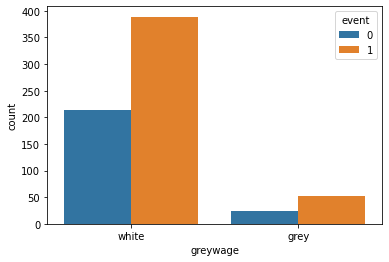

In [29]:
sns.countplot(data=train, x='greywage', hue = 'event')

In [30]:
train['greywage'] = train['greywage'].fillna('white')

In [31]:
train['way'] = train['way'].fillna('bus')

In [32]:
train['gendermatch'] = (train['gender']==train['head_gender'])
test['gendermatch'] = (test['gender']==test['head_gender'])

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    int64  
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   coach         699 non-null    object 
 7   head_gender   699 non-null    object 
 8   greywage      699 non-null    object 
 9   way           699 non-null    object 
 10  extraversion  699 non-null    float64
 11  independ      699 non-null    float64
 12  selfcontrol   699 non-null    float64
 13  anxiety       699 non-null    float64
 14  novator       699 non-null    float64
 15  gendermatch   699 non-null    bool   
dtypes: bool(1), float64(6), int64(2), object(7)
memory usage: 108.1+ KB


In [34]:
train['profession'].value_counts()

HR                     465
Sales                   45
IT                      27
etc                     27
Marketing               26
BusinessDevelopment     18
manage                  17
Consult                 16
Engineer                12
Teaching                11
Commercial              10
Finan?                  10
Law                      6
Accounting               6
PR                       3
Name: profession, dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    int64  
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   coach         699 non-null    object 
 7   head_gender   699 non-null    object 
 8   greywage      699 non-null    object 
 9   way           699 non-null    object 
 10  extraversion  699 non-null    float64
 11  independ      699 non-null    float64
 12  selfcontrol   699 non-null    float64
 13  anxiety       699 non-null    float64
 14  novator       699 non-null    float64
 15  gendermatch   699 non-null    bool   
dtypes: bool(1), float64(6), int64(2), object(7)
memory usage: 108.1+ KB


<AxesSubplot:xlabel='gendermatch', ylabel='count'>

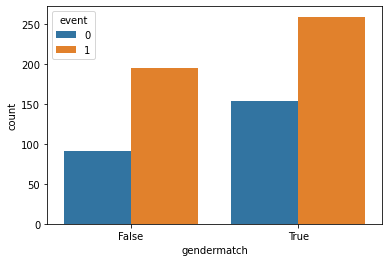

In [36]:
sns.countplot(data = train, x='gendermatch', hue = 'event')

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    int64  
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   coach         430 non-null    object 
 6   head_gender   360 non-null    object 
 7   greywage      430 non-null    object 
 8   way           430 non-null    object 
 9   extraversion  430 non-null    float64
 10  independ      430 non-null    float64
 11  selfcontrol   430 non-null    float64
 12  anxiety       430 non-null    float64
 13  novator       430 non-null    float64
 14  gendermatch   430 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 50.8+ KB


In [38]:
test['head_gender'] = test['head_gender'].fillna('f')

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    int64  
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   coach         430 non-null    object 
 6   head_gender   430 non-null    object 
 7   greywage      430 non-null    object 
 8   way           430 non-null    object 
 9   extraversion  430 non-null    float64
 10  independ      430 non-null    float64
 11  selfcontrol   430 non-null    float64
 12  anxiety       430 non-null    float64
 13  novator       430 non-null    float64
 14  gendermatch   430 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 50.8+ KB


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    int64  
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   coach         699 non-null    object 
 7   head_gender   699 non-null    object 
 8   greywage      699 non-null    object 
 9   way           699 non-null    object 
 10  extraversion  699 non-null    float64
 11  independ      699 non-null    float64
 12  selfcontrol   699 non-null    float64
 13  anxiety       699 non-null    float64
 14  novator       699 non-null    float64
 15  gendermatch   699 non-null    bool   
dtypes: bool(1), float64(6), int64(2), object(7)
memory usage: 108.1+ KB


In [41]:
y_train = train['event']
X_train = train.drop('event', axis=1)
X_test = test

In [42]:
X_train.shape

(699, 15)

In [43]:
y_train.shape

(699,)

In [44]:
X_test.shape

(430, 15)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    int64  
 1   gender        699 non-null    object 
 2   age           699 non-null    float64
 3   industry      699 non-null    object 
 4   profession    699 non-null    object 
 5   coach         699 non-null    object 
 6   head_gender   699 non-null    object 
 7   greywage      699 non-null    object 
 8   way           699 non-null    object 
 9   extraversion  699 non-null    float64
 10  independ      699 non-null    float64
 11  selfcontrol   699 non-null    float64
 12  anxiety       699 non-null    float64
 13  novator       699 non-null    float64
 14  gendermatch   699 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 102.6+ KB


In [46]:
cat_feature = ['gender','industry','profession','coach','head_gender','greywage','way','gendermatch']

In [47]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i],prefix=i)
    X_train = pd.concat([X_train,dummy],axis = 1)
    X_train.drop(i,axis=1,inplace=True)

In [48]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i],prefix=i)
    X_test = pd.concat([X_test,dummy],axis = 1)
    X_test.drop(i,axis=1,inplace=True)

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            430 non-null    int64  
 1   age                             430 non-null    float64
 2   extraversion                    430 non-null    float64
 3   independ                        430 non-null    float64
 4   selfcontrol                     430 non-null    float64
 5   anxiety                         430 non-null    float64
 6   novator                         430 non-null    float64
 7   gender_f                        430 non-null    uint8  
 8   gender_m                        430 non-null    uint8  
 9   industry_ HoReCa                430 non-null    uint8  
 10  industry_Agriculture            430 non-null    uint8  
 11  industry_Banks                  430 non-null    uint8  
 12  industry_Building               4

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            699 non-null    int64  
 1   age                             699 non-null    float64
 2   extraversion                    699 non-null    float64
 3   independ                        699 non-null    float64
 4   selfcontrol                     699 non-null    float64
 5   anxiety                         699 non-null    float64
 6   novator                         699 non-null    float64
 7   gender_f                        699 non-null    uint8  
 8   gender_m                        699 non-null    uint8  
 9   industry_ HoReCa                699 non-null    uint8  
 10  industry_Agriculture            699 non-null    uint8  
 11  industry_Banks                  699 non-null    uint8  
 12  industry_Building               699 

In [51]:
X_train['age'] = X_train['age'].astype('int64')
X_test['age'] = X_test['age'].astype('int64')

In [52]:
X_train['extraversion'] = X_train['extraversion'].astype('int64')
X_test['extraversion'] = X_test['extraversion'].astype('int64')

In [53]:
X_train['independ'] = X_train['independ'].astype('int64')
X_test['independ'] = X_test['independ'].astype('int64')

In [54]:
for i in X_train['selfcontrol']:
    print(i)

5.7
5.7
2.6
4.9
8.0
4.1
4.1
8.0
2.6
3.3
1.8
4.9
4.9
4.1
4.1
4.9
3.3
2.6
3.3
6.4
5.7
4.9
5.7
7.2
8.7
3.3
5.7
9.5
7.2
8.0
4.9
4.1
6.4
4.1
4.1
8.7
4.9
4.9
4.9
4.9
4.9
6.4
7.2
5.7
8.0
8.0
4.1
4.9
5.7
5.7
5.7
7.2
4.9
2.6
3.3
7.2
5.7
4.1
4.1
6.4
3.3
3.3
8.0
7.2
6.4
4.1
5.7
6.4
7.2
4.1
3.3
6.4
3.3
1.0
4.9
6.4
4.1
4.1
4.1
7.2
8.7
4.9
2.6
7.2
5.7
7.2
8.0
7.2
5.7
4.1
4.1
1.8
4.9
4.1
5.7
5.7
5.7
8.0
10.0
5.7
4.1
4.9
3.3
5.7
5.7
5.7
8.7
8.0
6.4
6.4
1.0
2.6
5.7
7.2
4.9
5.7
6.4
1.8
1.8
4.9
8.7
9.5
5.7
5.7
5.7
8.7
6.4
3.3
2.6
3.3
8.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
5.7
4.1
6.4
5.7
4.9
7.2
4.1
4.9
5.7
6.4
4.9
8.7
5.7
4.9
4.9
4.9
4.9
4.1
7.2
6.4
4.1
5.7
2.6
6.4
6.4
4.9
3.3
6.4
4.9
4.1
4.1
6.4
5.7
7.2
5.7
6.4
5.7
6.4
8.0
4.9
4.9
4.1
7.2
6.4
8.0
7.2
4.1
5.7
7.2
4.9
5.7
5.7
9.5
8.0
8.7
7.2
4.1
2.6
5.7
4.9
3.3
9.5
2.6
3.3
4.1
8.7
7.2
4.1
4.1
4.9
7.2
5.7
8.0
5.7
8.0
4.9
4.1
2.6
8.7
3.3
6.4
3.3
5.7
5.7
8.7
8.0
4.9
3.3
7.2
8.7
8.7
8.0
6.4
6.4
1.0
4.9
3.3
7.2
7.2
7.2
4.1
8.0
4.9
4.9

In [55]:
X_train['selfcontrol'] = X_train['selfcontrol'].astype('int64')
X_test['selfcontrol'] = X_test['selfcontrol'].astype('int64')

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            699 non-null    int64  
 1   age                             699 non-null    int64  
 2   extraversion                    699 non-null    int64  
 3   independ                        699 non-null    int64  
 4   selfcontrol                     699 non-null    int64  
 5   anxiety                         699 non-null    float64
 6   novator                         699 non-null    float64
 7   gender_f                        699 non-null    uint8  
 8   gender_m                        699 non-null    uint8  
 9   industry_ HoReCa                699 non-null    uint8  
 10  industry_Agriculture            699 non-null    uint8  
 11  industry_Banks                  699 non-null    uint8  
 12  industry_Building               699 

In [57]:
set(X_train.columns) - set(X_test.columns)

set()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [60]:
result = cross_val_score(knn_model, X_train, y_train, cv=5)
result

array([0.52142857, 0.65      , 0.48571429, 0.58571429, 0.58273381])